#### A Computaional Mathematics project by Kojo Nketia, Richard Atigidah, Dickson Mensah and Joana Kodiah



# <center> Image Derivative </center>

#### An image? What is it?

An image is an array of blocks arranged in rows and columns (in a form of matrix) where each block is referred to as a pixel.

In [1]:
# imported libaries

from PIL import Image
import numpy as np
%pylab inline

ImageRep = Image.open("files\\imagerep.jpg")

ImageFunc = Image.open("files\\f(x,y).png")

Lena = "files\\Lena.png"

Lena_image = (Image.open('files\\Lena.png')).convert('L')

Convolution_Illustration = Image.open('files\\filter.png')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Image Representation

Consider the grayscale image (a) below. When zoomed, the image becomes distorted and hence projecting a picture that is formed by many blocks (b). Each block, called a pixel, is made up of a color and each color is represented as a number between 0 - 255. This number defines a shade of gray. (c) is the transformation of the image into a 9$\times$9 matrix.

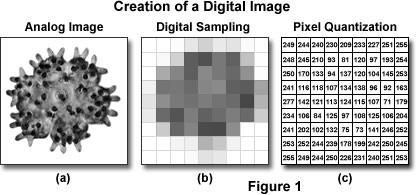

In [2]:
ImageRep

Images can also be defined as a function $ \textbf{f(x,y)} $, where  $ \textbf{x} $  is the row number and $  \textbf{y}  $ is the column number and that defines a pixel value in the image, as indicated below.

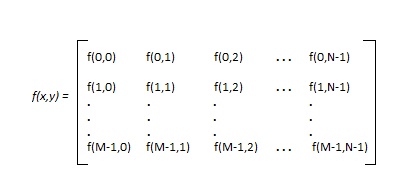

In [3]:
ImageFunc

### Partial Derivative

* The partial derivative of a function of several variables is the rate of change of a variable with respect to another variable whilst the other variables are held constant.
* Mathematically represented as; 
$$ f_{x}(x,y) = lim_{\Delta x \to 0} \dfrac{f(x+\Delta x,y) \ - \ f(x,y)}{\Delta x}  $$ <br> <br> that is the partial derivative of a function of several variables with respect to $ x $.

<b> The derivative above applies to continuous functions. Perhaps, in image processing, we have data points (pixel values or numbers in the image's array) to differentiate but not a continuous function so the derivative must be applied in the discrete sense.

### Discrete Partial Derivative

* The derivative of a continuous function $ f(x,y) $ with respect to $ x $ is <br> 
$ f_{x}(x,y) = lim_{\Delta x \to 0} \dfrac{f(x+\Delta x,y) \ - \ f(x,y)}{\Delta x} $ and with respect to $ y $ is <br> <br>
$ f_{y}(x,y) = lim_{\Delta x \to 0} \dfrac{f(x,y+\Delta y) \ - \ f(x,y)}{\Delta y} $
* Now, being given a set of data points to find the derivative, this derivative will be calculated by <br> $ \dfrac{df}{dx} \ = \ f^\prime(x) = lim_{\Delta x \to 0} \dfrac{f(x) \ - \ f(x-\Delta x)}{\Delta x} $. 
* We choose $ \Delta x $ = 1, that is the smallest pixel value we can consider to find the derivative.
So, we have;
* $ \dfrac{df}{dx} \ = \ f^\prime(x) = lim_{\Delta x \to 0} \dfrac{f(x) \ - \ f(x-\Delta x)}{\Delta x} \Rightarrow lim_{\Delta x \to 1} \dfrac{f(x) \ - \ f(x-1)}{1} \Rightarrow  f(x) \ - \ f(x-1) $

### Finite Difference Formulas
These are the methods of derivative that can be used to find the derivative of a given data of an image, where $ \Delta x =1 $. They are;

* <b> <u> Backward Difference </b> <br>
$ \dfrac{df}{dx} = f^\prime(x) = f(x) \ - \ f(x-1) $
* <b> Forward Difference </b> <br>
$ \dfrac{df}{dx} = f^\prime(x) = f(x+1) \ - \ f(x) $
* <b> Central difference </b> <br>
$ \dfrac{df}{dx} = f^\prime(x) = \dfrac{f(x+1) \ - \ f(x-1)}{2} $

#### An Example

Basically, this is how the differentiation is calculated. Now, by the backward difference formula, <br> Let <br>
$ f(x) = 10 \ \ \ 15 \ \ \ 10 \ \ \ 10 \ \ \ 25 \ \ \ 20 \ \ \ 20 $ <br> then <br>
$ f^{\prime}(x) =  0 \ \ \ 5 \ \ \ -5 \ \ \ 0 \ \ \ 15 \ \ \ -5 \ \ \ 0 $


## Applying the theories on an image

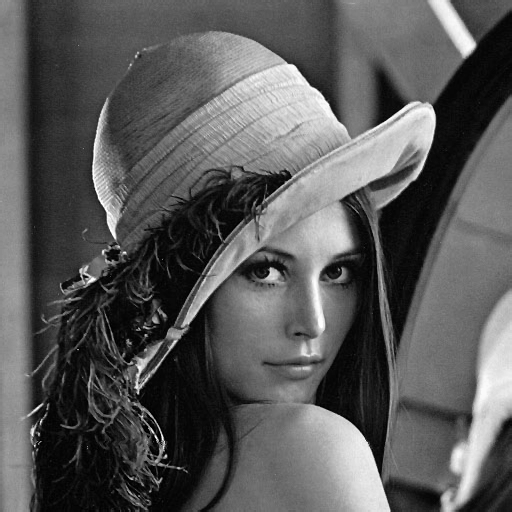

In [4]:
Lena_image

### The partial derivative of an image in the x-direction and y-direction using the backward difference method 

* The derivative in the x-direction was calculated by taking a row and substracting the immediate row from it
* Also, the derivative in the y-direction was calculated by taking a column and substracting the immediate column from it

In [5]:
def image_derivative_in_x_direction(input_image):
    from PIL import Image
    import numpy as np

    image = Image.open(input_image).convert('L')    #reading the image
    image_array = np.array(image)    #image's array
    
    derivative = image_array[1:,:] - image_array[:-1,:]    #applying the derivtive syntax

    new_image_array = derivative.astype(np.uint8)        #new image's array
    derivative_image = Image.fromarray(new_image_array)  # derivative image 
        
    return derivative_image

In [6]:
def image_derivative_in_y_direction(input_image):
    from PIL import Image
    import numpy as np
    
    image = Image.open(input_image).convert('L')    #reading the image
    image_array = np.array(image)     #image's array
    
    derivative = image_array[:,1:] - image_array[:,:-1]     # the derivative syntax

    new_image_array = derivative.astype(np.uint8)        #new image array
    derivative_image = Image.fromarray(new_image_array)       #derivative image
        
    return derivative_image

In [7]:
# plotting images

figure(figsize = (15,15))

subplot(2,2,1)
plt.axis('off')
imshow(image_derivative_in_x_direction(Lena), cmap = 'gray');
title('x-direction derivative',fontsize = 20)

subplot(2,2,2)
plt.axis('off')
imshow(image_derivative_in_y_direction(Lena), cmap = 'gray');
title('y-direction derivative', fontsize = 20)

Text(0.5, 1.0, 'y-direction derivative')

### Image Noise

Image noise is random variation of brightness or color information in images -_Wikipedia_. Noise affects our image derivative. <br> 
To reduce this noise in our image, we first smoothen or blur our image, and then take the derivative. In addition, image noise is the unwanted details present in an image after taking a derivative.

## Smoothing by convolution

For the smoothing of Lena's image, we used the <b> Box Filter (Average Filter) </b> = $ \dfrac{1}{49} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 1 & 1 & 1\\ \end{bmatrix} $ by convolution. <br> 
<br>
Perhaps, there are other filters available to use to smoothen the image. <br> 
<blockquote> <b> Convolution is the sum of all the entries of the component-wise product of local pixels and a filter, as illustrated below. </b> </blockquote>

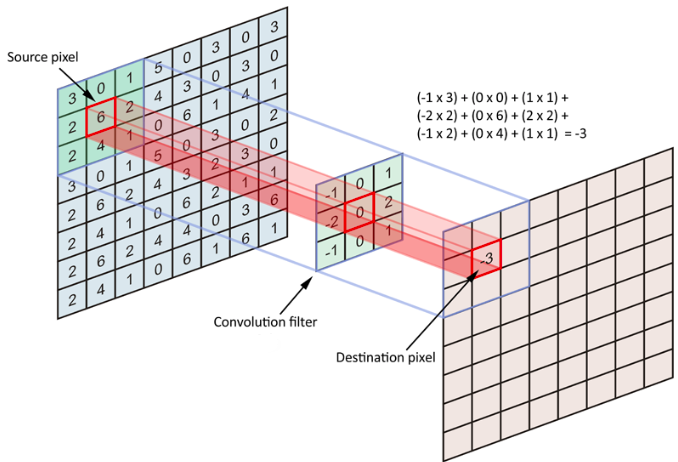

In [8]:
Convolution_Illustration

In [9]:
def average_smoothing(input_image):
    from PIL import Image
    import numpy as np

    image = (Image.open(input_image)).convert('L')

    image_array = np.array(image)   #getting the image's array

    n,m = image_array.shape    #getting the dimension of the image array; n = rows, m = columns

    smoothing_array = np.zeros((n,m))

    smoothing_kernel = np.ones((7,7))   #the smoothing kernel
    
    for row in range(n-6):
        for column in range(m-6):
            local_pixels = image_array[row:row+7, column:column+7]

            pixel_value = ((1/49) * smoothing_kernel * local_pixels).sum()
            
            smoothing_array[row+3:row+4, column+3:column+4] = pixel_value

    smoothing_array = smoothing_array.astype(np.uint8)
    smooth_image = Image.fromarray(smoothing_array)
        
    return smooth_image

In [10]:
figure(figsize = (15,15))

subplot(221)
plt.axis('off')
imshow(Lena_image, cmap = 'gray');
title('Original Image',fontsize = 30)

subplot(222)
plt.axis('off')
imshow(average_smoothing(Lena), cmap = 'gray');
title('After the Average \n Smoothing',fontsize = 30)

Text(0.5, 1.0, 'After the Average \n Smoothing')

In [11]:
def third_average_smoothing(input_image):
    #------------------ This function smoothens the image two times ----------------
    from PIL import Image
    import numpy as np

    image = (Image.open(input_image)).convert('L')

    image_array = np.array(image)   # the image's array 

    n,m = image_array.shape  # the dimension of the image array; n = rows, m = columns

    smoothing_array1 = np.zeros((n,m))
    smoothing_array2 = np.zeros((n,m))
    smoothing_array3 = np.zeros((n,m))

    smoothing_kernel = np.ones((7,7))   #the smoothing kernel
    
    for row in range(n-6):
        for column in range(m-6):
            local_pixels = image_array[row:row+7, column:column+7]

            pixel_value = ((1/49) * smoothing_kernel * local_pixels).sum()
            
            smoothing_array1[row+3:row+4, column+3:column+4] = pixel_value

    for row in range(n-6):
        for column in range(m-6):
            local_pixels = smoothing_array1[row:row+7, column:column+7]

            pixel_value = ((1/49) * smoothing_kernel * local_pixels).sum()
            
            smoothing_array2[row+3:row+4, column+3:column+4] = pixel_value

    for row in range(n-6):
        for column in range(m-6):
            local_pixels = smoothing_array2[row:row+7, column:column+7]

            pixel_value = ((1/49) * smoothing_kernel * local_pixels).sum()
            
            smoothing_array3[row+3:row+4, column+3:column+4] = pixel_value

    smoothing_array3 = smoothing_array3.astype(np.uint8)
    smooth_image = Image.fromarray(smoothing_array3)
        
    return smooth_image

In [12]:
figure(figsize = (15,15))

subplot(221)
plt.axis('off')
imshow(average_smoothing(Lena), cmap = 'gray');
title('First Average \n Smoothing',fontsize = 30)

subplot(222)
plt.axis('off')
imshow(third_average_smoothing(Lena), cmap = 'gray');
title('Third Average \n Smoothing',fontsize = 30)

Text(0.5, 1.0, 'Third Average \n Smoothing')

### Gaussian smoothing

The filter used for the gaussian smoothen is $ \dfrac{1}{1003} \begin{bmatrix} 0 & 0 & 1 & 2 & 1 & 0 & 0 \\ 0 & 3 & 13 & 22 & 13 & 3 & 0 \\ 1 & 13 & 59 & 97 & 59 & 13 & 1 \\ 2 & 22 & 97 & 159 & 97 & 22 & 2 \\ 1 & 13 & 59 & 97 & 59 & 13 & 1 \\ 0 & 3 & 13 & 22 & 13 & 3 & 0 \\ 0 & 0 & 1 & 2 & 1 & 0 & 0  \end{bmatrix} $ and this is where $ \sigma = 1 $. <br>
* The result for the first image smoothing wasn't smooth enough for our derivative so we smoothen the image three times using the gaussian filter.

In [13]:
def gaussian_smoothing(input_image):
    from PIL import Image
    import numpy as np
    
    image = (Image.open(input_image)).convert('L')    #reading the image in grayscale mode
    image_array = np.array(image)

    n,m = image_array.shape #getting the dimension of the image; n = rows and m = columns

    gaussian_kernel = ([[0,0,1,2,1,0,0], [0,3,13,22,13,3,0], [1,13,59,97,59,13,1]
        ,[2,22,79,159,79,22,2],[1,13,59,97,59,13,1],[0,3,13,22,13,3,0],[0,0,1,2,1,0,0]])
    
    smoothing_image_array = np.zeros((n,m))     # smoothing image
    
    for row in range(n-6):
        for col in range(m-6):
            local_pixels = image_array[row:row+7, col:col+7] 
            
            #apply the gaussian kernel
            transformed_pixels = gaussian_kernel * local_pixels
            pixel_value = transformed_pixels.sum()/1003
            
            smoothing_image_array[row+3:row+4,col+3:col+4] = pixel_value


    smoothing_image_array = smoothing_image_array.astype(np.uint8)
    smoothen_image = (Image.fromarray(smoothing_image_array))
    
    return smoothen_image

In [14]:
def third_gaussian_smoothing(input_image):
    from PIL import Image
    import numpy as np
    
    image = (Image.open(input_image)).convert('L')    #reading the image in grayscale mode
    image_array = np.array(image)

    n,m = image_array.shape #getting the dimension of the image; n = rows and m = columns

    gaussian_kernel = np.array([[0,0,1,2,1,0,0], [0,3,13,22,13,3,0], [1,13,59,97,59,13,1]
        ,[2,22,79,159,79,22,2],[1,13,59,97,59,13,1],[0,3,13,22,13,3,0],[0,0,1,2,1,0,0]])
    
    smoothing_array1 = np.zeros((n,m))     # first smooth image array
    smoothing_array2 = np.zeros((n,m))    # second smooth image array
    smoothing_array3 = np.zeros((n,m))     # final smooth image array

    for row in range(n-6):
        for col in range(m-6):
            local_pixels = image_array[row:row+7, col:col+7] 
            
            #apply the gaussian kernel
            transformed_pixels = gaussian_kernel * local_pixels
            pixel_value = transformed_pixels.sum()/1003
            
            smoothing_array1[row+3:row+4,col+3:col+4] = pixel_value

    for row in range(n-6):
        for col in range(m-6):
            local_pixels = smoothing_array1[row:row+7, col:col+7] 
            
            #apply the gaussian kernel
            transformed_pixels = gaussian_kernel * local_pixels
            pixel_value = transformed_pixels.sum()/1003
            
            smoothing_array2[row+3:row+4,col+3:col+4] = pixel_value

    for row in range(n-6):
        for col in range(m-6):
            local_pixels = smoothing_array2[row:row+7, col:col+7] 
            
            #apply the gaussian kernel
            transformed_pixels = gaussian_kernel * local_pixels
            pixel_value = transformed_pixels.sum()/1003
            
            smoothing_array3[row+3:row+4,col+3:col+4] = pixel_value


    smoothing_array3 = smoothing_array3.astype(np.uint8)
    smoothen_image = (Image.fromarray(smoothing_array3))
    
    return smoothen_image

In [15]:
figure(figsize = (15,15))

subplot(221)
plt.axis('off')
imshow(gaussian_smoothing(Lena), cmap = 'gray');
title('After the first \n Gaussian smoothing',fontsize = 30)

subplot(222)
plt.axis('off')
imshow(third_gaussian_smoothing(Lena), cmap = 'gray');
title('After the third \n Gaussian Smoothing',fontsize = 30)

Text(0.5, 1.0, 'After the third \n Gaussian Smoothing')

### <center> Averaging VS Gaussian </center>

In [16]:
figure(figsize = (10,10))

subplot(221)
plt.axis('off')
imshow(average_smoothing(Lena), cmap = 'gray');
title('First Averaging Smoothing',fontsize = 15)

subplot(222)
plt.axis('off')
imshow(gaussian_smoothing(Lena), cmap = 'gray');
title('First Gaussian smoothing',fontsize = 15)

subplot(223)
plt.axis('off')
imshow(third_average_smoothing(Lena), cmap = 'gray');
title('Third Averaging Smoothing',fontsize = 15)

subplot(224)
plt.axis('off')
imshow(third_gaussian_smoothing(Lena), cmap = 'gray');
title('Third Gaussian Smoothing',fontsize = 15)

Text(0.5, 1.0, 'Third Gaussian Smoothing')

### A look into all the partial derivatives

#### <center> x-direction partial derivative </center>

In [17]:
# plotting images

figure(figsize = (10,10))

subplot(2,2,1)
plt.axis('off')
imshow(image_derivative_in_x_direction(Lena), cmap = 'gray');
title('Original Image', fontsize = 15)
annotate('',xy=(450, 150),xytext=(150, 150) ,arrowprops=dict(facecolor='red'))      


subplot(2,2,2)
plt.axis('off')
imshow(image_derivative_in_x_direction('files\\first average smoothen.png'), cmap = 'gray');
title('First Smoothen image', fontsize = 15)   


subplot(2,2,3)
plt.axis('off')
imshow(image_derivative_in_x_direction('files\\first gaussian smoothen.png'), cmap = 'gray');
title('First Gaussian Smoothen Image',fontsize = 15)

subplot(2,2,4)
plt.axis('off')
imshow(image_derivative_in_x_direction('files\\third average smoothen.png'), cmap = 'gray');
title('Third Average Smoothen Image', fontsize = 15)

#suptitle('x-direction partial derivative')

Text(0.5, 1.0, 'Third Average Smoothen Image')

<blockquote> <font size = "4"> <b> Analysis: The x-direction partial derivative of an image shows more <u> horizontal edges </u> in the image </b> </font> </blockquote>

#### <center> y-direction partial derivative

In [18]:
# plotting images

figure(figsize = (10,10))

subplot(2,2,1)
plt.axis('off')
imshow(image_derivative_in_y_direction(Lena), cmap = "gray");
title('Original Image', fontsize = 15)
annotate('', xy=(150, 150 ),xytext=(150, 350) ,arrowprops=dict(facecolor="red"))      

subplot(2,2,2)
plt.axis('off')
imshow(image_derivative_in_y_direction("files\\first average smoothen.png"), cmap = "gray");
title('First Average Smoothen image', fontsize = 15)   


subplot(2,2,3)
plt.axis('off')
imshow(image_derivative_in_y_direction("files\\first gaussian smoothen.png"), cmap = "gray");
title('First Gaussian Smoothen Image', fontsize = 15)

subplot(2,2,4)
plt.axis('off')
imshow(image_derivative_in_y_direction("files\\third average smoothen.png"), cmap = "gray");
title('Third Average Smoothen Image', fontsize = 15)

#suptitle('x-direction partial derivative')

Text(0.5, 1.0, 'Third Average Smoothen Image')

<blockquote> <font size = "4"> <b> Analysis: The y-direction partial derivative of an image shows more <u> vertical edges </u> in the image </b> </font> </blockquote>

# <center> Application Of Image Derivative </center>

##  <u> Edge Detection </u>

* The derivative of an image can be used to detect the edges of the image. The edges show the rapid change in the pixel values of an image.
* By computing the Image Gradient of the array of image and finding its magnitude, you get to see the edges of the image after showing it. <br>
* The <b> Image Gradient </b> is given by $ \nabla f = \bigg[f_{x},f_{y} \bigg] $  <br>
* The <b> Magnitude of the   Image Gradient </b> = $ |\nabla f| = \sqrt{{f_{x}}^{2} + {f_{y}}^{2}} $ <br>
* $ |\nabla f|$ captures the edges of the image.

In [19]:
def edge_detector(input_image):
    #---------------------Backward Difference--------------------

    from PIL import Image
    import numpy as np
    
    image = Image.open(input_image).convert('L')    #reading and converting image to grayscale
    
    image_array = np.array(image)     #image array for the derivative
    x_derivative_array = []           #the entries of the derivative in x direction will be fixed here
    
    n,m = image_array.shape        #getting the dimension image's array, n = no. of row & m = no. of columns
    
    
    #------------ This process is to maintain the dimension after the derivative ------------
    # Derivative in the x-direction
    for row in image_array:
        sub_row = [row[0]]      
        for i in range(m-1):
            sub_row.append(row[i])

        new_row = (row - sub_row).tolist()

        x_derivative_array.append(new_row)    #this syntax fixes the new row after the derivative
                                              # into the x derivative array

    # Derivative in the y-direction
    for row in image_array:
        new_image_array = [row.tolist()]      #fixes the first row of image array into the new one

        #This loop fixes the first row to the row before the last row into the new image array then break
        for row in image_array:
            new_image_array.append((row).tolist())    

            if len(new_image_array) == n:
                break
        break
    
    y_derivative_array = image_array - new_image_array    #calculates the y derivative 
    x_derivative_array = np.array(x_derivative_array)
   
    
    #Computing the image gradient
    image_gradient = np.sqrt((x_derivative_array**2) + (y_derivative_array**2))
   
            
    image_gradient = image_gradient.astype(np.uint8) 
    image_with_edges = Image.fromarray(image_gradient)
    
    return image_with_edges
    

In [20]:
# plotting images

figure(figsize = (10,10))

subplot(2,2,1)
plt.axis('off')
imshow(Lena_image, cmap = 'gray');
title('Original Image',fontsize = 20)

subplot(2,2,2)
plt.axis('off')
imshow(edge_detector(Lena), cmap = 'gray');
title('''Original Image's Edges''',fontsize = 20)

subplot(2,2,3)
plt.axis('off')
imshow(edge_detector('files\\first average smoothen.png'), cmap = 'gray');
title('Average Smoothen Edges',fontsize = 20)

subplot(2,2,4);
plt.axis('off')
imshow(edge_detector('files\\first gaussian smoothen.png'), cmap = 'gray');
title('Gaussian Smoothen Edges',fontsize = 20)

Text(0.5, 1.0, 'Gaussian Smoothen Edges')

### <center> <u> Edge Detection Using Sobel Filter </u>

After finding the edges of our image with the usual derivative, we opted to use another derivative filter, that is Sobel's Filter, to find for the derivatives of the image and then compute the magnitude of its image gradient to detect the edges. <br>
* In this procedure, we used the widely known filter for image derivative called <b> Sobel's Filter </b> to find the derivaive both in the $ x $ and $ y $ direction. <br> 
* These filters are $ \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $ and $ \begin{bmatrix} -1 & \ 0 & 1 \\ -2 & \ 0 & 2 \\ -1 & \ 0 & 1 \end{bmatrix} $ for the vertical and horizontal derivative respectively. Convolution is also applied in this procedure. <br>
* Then, we calculate the image gradient for the vertical and horizontal transformed arrays. After that, we get the image with edges.

In [21]:
def sobel_edge_detector(input_image):
    from PIL import Image
    import numpy as np

    image = Image.open(input_image).convert('L')    #reading the image in grayscale mode
    image_array = np.array(image)

    n,m = image_array.shape #getting the dimension of the image; n = rows and m = columns

    vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]       #sobel vertical filter
    horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]     #sobel horizontal filter

    edges_image_array = np.zeros((n,m)) 

    for row in range(n-2):
        for col in range(m-2):
            local_pixels = image_array[row:row+3, col:col+3] 
            
            #apply the vertical filter
            vertical_transformed_pixels = vertical_filter*local_pixels
            vertical_score = vertical_transformed_pixels.sum()/4
            
            #apply the horizontal filter
            horizontal_transformed_pixels = horizontal_filter*local_pixels
            horizontal_score = horizontal_transformed_pixels.sum()/4
            
            #by using the image gradient formula
            edge_value = np.sqrt(vertical_score**2 + horizontal_score**2)
            
            #insert this edge value into the edges image
            edges_image_array[row+1:row+2,col+1:col+2] = edge_value


    edges_image_array = edges_image_array.astype(np.uint8)
    edges_image = (Image.fromarray(edges_image_array))
    
    return edges_image

In [22]:
# plotting images

figure(figsize=(7,7))

subplot(221)
plt.axis('off')
imshow(sobel_edge_detector('files\\Lena.png'),cmap = 'gray');
title('Original Image', fontsize = 7)

subplot(222)
plt.axis('off')
imshow(sobel_edge_detector('files\\first average smoothen.png'),cmap = 'gray');
title('First Average Smoothen', fontsize = 7)

subplot(223)
plt.axis('off')
imshow(sobel_edge_detector('files\\first gaussian smoothen.png'),cmap = 'gray');
title('First Gaussian Smoothen', fontsize = 7)

subplot(224)
plt.axis('off')
imshow(sobel_edge_detector('files\\third average smoothen.png'),cmap = 'gray');
title('Third Average Smoothen', fontsize = 7)

suptitle('Edges Of Image With Sobel Operator',fontsize = 20)


Text(0.5, 0.98, 'Edges Of Image With Sobel Operator')

<blockquote> <font size = "4"> <b> Additional Information: </b> The sobel filter can be associated to a package that applies both the smoothing and derivative on an image. In reference to the above image, you could see that the details in the image is out and the derivative has been applied. </font> </blockquote>

So $ \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix} $ serves as a low smoothing filter and the filter $ \begin{bmatrix} -1 & 0 & 1 \end{bmatrix} $ basically computes the derivative and this explains the result. In finding the derivative before convolution, the obtained pixel value was divided by 4 and that is avergae of the vertical filter, hence a smoothing process was implicitly performed.

# Conclusion

* <b> Image derivative </b> is the change in the pixel values of an image.
* In the process of finding the derivative of the given image, we use the guassian filter and the average filter to reduce the level of noise in the image.
* We then found the derivative of the image using the backwards difference method the sobel filter(central difference method ). By comparison the edge dectection in both the x and y direction after applying the sobel filter was clearer than applying the backwards difference method. 
* Then magnitude of the image gradient fuses the derivatives of the image in both the x and y direction to enable you see the edges clearly 
* For future works, we shall apply this to artificial intelligence systems that utilizes edge detection to operate.

# An Extension 

#### The partial derivative in the x and y direction using the forward difference formula

In [23]:
def forward_image_derivative_in_x_direction(input_image):
    from PIL import Image
    import numpy as np

    image = Image.open(input_image).convert('L')    #reading the image
    image_array = np.array(image)    #image's array
    
    derivative = image_array[:-1,:] - image_array[1:,:]    #applying the derivtive syntax

    new_image_array = derivative.astype(np.uint8)        #new image's array
    derivative_image = Image.fromarray(new_image_array)  # derivative image 
        
    return derivative_image

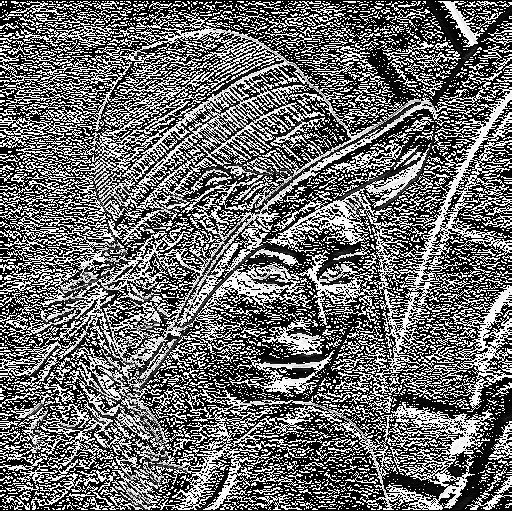

In [24]:
forward_image_derivative_in_x_direction(Lena)

#### The partial derivative in the x and y direction using the central difference formula

In [25]:
def central_image_derivative_in_x_direction(input_image):
    from PIL import Image
    import numpy as np

    image = Image.open(input_image).convert('L')    #reading the image
    image_array = np.array(image)    #image's array
    
    derivative = (image_array[:-2,:] - image_array[2:,:])/2    #applying the derivtive syntax

    new_image_array = derivative.astype(np.uint8)        #new image's array
    derivative_image = Image.fromarray(new_image_array)  # derivative image 
        
    return derivative_image

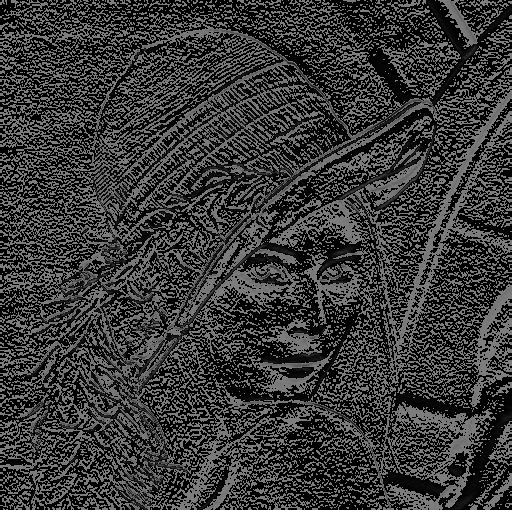

In [26]:
central_image_derivative_in_x_direction(Lena)

#### <center> Forward Difference VS Central Difference </center>

##### <center> partial derivative in x-direction

In [27]:
# plotting images

figure(figsize = (10,10))

subplot(2,2,1)
plt.axis('off')
imshow(forward_image_derivative_in_x_direction(Lena), cmap = 'gray');
title('Original Image With \n Forward Difference', fontsize = 15)
annotate('',xy=(450, 150),xytext=(150, 150) ,arrowprops=dict(facecolor='red'))      

subplot(2,2,2)
plt.axis('off')
imshow(central_image_derivative_in_x_direction(Lena), cmap = 'gray');
title('Original Image With \n Central Difference',fontsize = 15)

#suptitle('x-direction partial derivative')

Text(0.5, 1.0, 'Original Image With \n Central Difference')

## <center> All the finite differences

In [28]:
# plotting images

figure(figsize = (7,7))

subplot(2,2,1)
plt.axis('off')
imshow(Lena_image, cmap = 'gray');
title('Original Image');

subplot(2,2,2)
plt.axis('off')
imshow(image_derivative_in_x_direction(Lena), cmap = 'gray');
title('Original Image With \n Backward Difference', fontsize = 7)  ;   

subplot(2,2,3)
plt.axis('off')
imshow(forward_image_derivative_in_x_direction(Lena), cmap = 'gray');
title('Original Image With \n Forward Difference',fontsize = 7);

subplot(2,2,4)
plt.axis('off')
imshow(central_image_derivative_in_x_direction(Lena), cmap = 'gray');
title('Original Image With \n Central Difference',fontsize = 7);

<b> <u>NOTE</u>: </b> The backward difference presents a good derivative image as compared to the others. But the choice of which one to use for personal or other analysis is yours.